# Naive Bayes'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Shape: ", df.shape)
df.isnull().sum()




Shape:  (150, 5)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['species'])
label

df.drop('species', axis = 1, inplace = True)
df['species'] = label

In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='Count'>

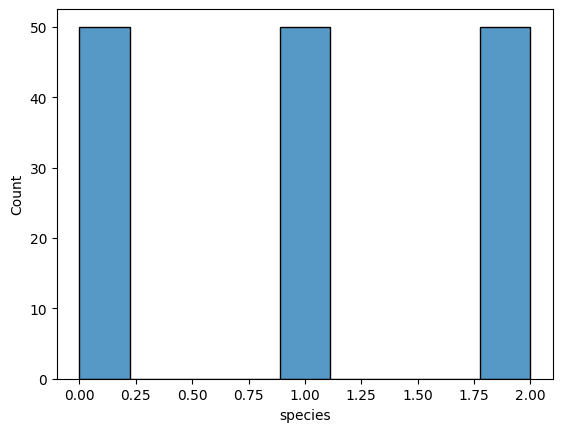

In [ ]:
sns.histplot(df['species'])

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df[features]
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [ ]:
Y_traind = pd.DataFrame(y_train)
Y_traind['species'].value_counts()

2    41
0    37
1    34
Name: species, dtype: int64

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test
# X_train = pd.DataFrame()

array([[-0.03642412,  2.3654605 , -1.46560477, -1.3069008 ],
       [-0.8763215 , -1.25712258, -0.44921013, -0.139032  ],
       [ 0.92345859, -0.04959489,  0.34131903,  0.2502576 ],
       [-0.51636548,  2.12395496, -1.4091384 , -1.0473744 ],
       [ 2.48326801,  1.88244942,  1.47064641,  1.0288368 ],
       [ 0.56350258,  0.67492173,  0.51071814,  0.509784  ],
       [ 1.28341461,  0.19191065,  0.73658362,  1.4181264 ],
       [-0.8763215 ,  1.88244942, -1.07034019, -1.0473744 ],
       [-1.35626285,  0.43341619, -1.2397393 , -1.3069008 ],
       [ 1.28341461,  0.43341619,  1.07538183,  1.4181264 ],
       [-0.2763948 , -0.7741115 ,  0.2283863 ,  0.1204944 ],
       [-0.51636548,  2.12395496, -1.18327293, -1.0473744 ],
       [ 1.52338529, -0.04959489,  1.18831457,  1.1586    ],
       [ 0.68348792,  0.43341619,  0.3977854 ,  0.3800208 ],
       [ 0.20354656, -0.29110043,  0.3977854 ,  0.3800208 ],
       [-1.71621887,  0.43341619, -1.4091384 , -1.3069008 ],
       [-0.03642412, -1.

In [ ]:
from sklearn.naive_bayes import GaussianNB

log_reg = GaussianNB()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy: ", acc)
print("F1 Score: ", f1)

Accuracy:  0.9736842105263158
F1 Score:  0.9736842105263158
